# Sliding Window
Description:
- Handle the input data in a specific window size

Why
- Reduce the use of nested loop and replace it with a single loop
- Reduce the time complexity

Reference
- https://levelup.gitconnected.com/dont-just-leetcode-follow-the-coding-patterns-instead-4beb6a197fdb
- https://www.geeksforgeeks.org/window-sliding-technique/

In [501]:
import pandas as pd
import numpy as np
import random

## Array

### 1. Get all subarray of size k


Use case: we want to build a pricing model based on a data set with data from 2000 to 2009. To estimate the model result when applying it on unseen and up-to-date data, we use sliding windows technique so we can train models with 3 years data and test with 1 years data.

In [474]:
def k_size_windows(arr, k):
    n = len(arr)
    
    if k > n:
        raise ValueError("Invalid K")
    
    windows = []
    for i in range(n-k+1):
        windows.append((arr[i:i+k-1], arr[i+k-1:i+k]))
    return windows

In [475]:
arr = [2000+i for i in range(10)]
print("All data:", arr)
k = 4
for res in k_size_windows(arr, k):
    print("Train:", res[0], "Test:", res[1])

All data: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Train: [2000, 2001, 2002] Test: [2003]
Train: [2001, 2002, 2003] Test: [2004]
Train: [2002, 2003, 2004] Test: [2005]
Train: [2003, 2004, 2005] Test: [2006]
Train: [2004, 2005, 2006] Test: [2007]
Train: [2005, 2006, 2007] Test: [2008]
Train: [2006, 2007, 2008] Test: [2009]


### 2. Get maximum sum of a subarray of size k
Use case: for a website, we want get the period (30 minutes) of a day that is with maximum usage rate

In [603]:
# Generating a table of hour:minute with random usage rate
# Make 20H with highest usage rate
usage_rate = {"Time":[], "Usage":[]}
for i in range(24):
    for j in range(60):
        hm = str(i).zfill(2)+":"+str(j).zfill(2)
        usage_rate["Time"].append(hm)
        if i == 20:
            usage_rate["Usage"].append(random.randint(8999, 9999))
        else:
            usage_rate["Usage"].append(random.randint(0, 5999))
usage_rate_df = pd.DataFrame(usage_rate)

In [604]:
usage_rate_df.head()

,Time,Usage
0,00:00,3183
1,00:01,2596
2,00:02,715
3,00:03,450
4,00:04,908


In [605]:
k = 30
def max_sum(df, index, value, k):
    arr = df[value].values
    times = df[index].values

    n = len(arr)
    
    if k > n:
        raise ValueError("Invalid K")
    
    window_sum = sum(arr[:k])
    max_sum = window_sum
    max_time = times[:k]
    for i in range(n - k):
        window_sum = window_sum - arr[i] + arr[i+k]
        
        if window_sum > max_sum:
            max_sum = window_sum
            max_time = times[i+1:i+k+1]
            
            
    return max_sum, max_time

<AxesSubplot:xlabel='Time'>

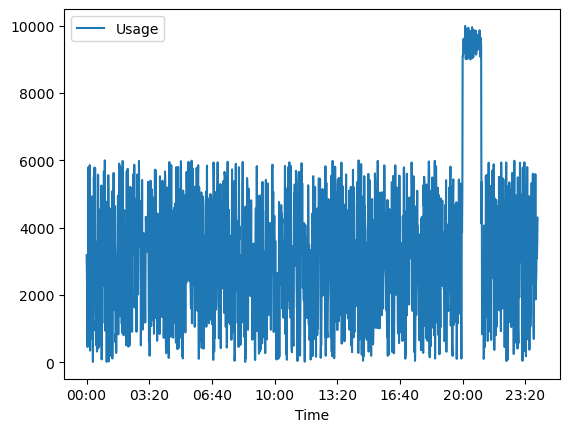

In [606]:
usage_rate_df.plot(x="Time", y="Usage")

In [607]:
max_sum(usage_rate_df, "Time", "Usage", 30)

(284424,
 array(['20:26', '20:27', '20:28', '20:29', '20:30', '20:31', '20:32',
        '20:33', '20:34', '20:35', '20:36', '20:37', '20:38', '20:39',
        '20:40', '20:41', '20:42', '20:43', '20:44', '20:45', '20:46',
        '20:47', '20:48', '20:49', '20:50', '20:51', '20:52', '20:53',
        '20:54', '20:55'], dtype=object))

### 3. Fruit Into Baskets
https://leetcode.com/problems/fruit-into-baskets/

## String

## HashTable